In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

In [5]:
df = pd.read_csv('pakwheels-11Jul2020.csv')
df.head()

,Ad No,Name,Price,Model Year,Location,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Body Type,Features,Last Updated,URL
0,4096758,Toyota Vitz F 1.0 2017,2385000.0,2017,"G- 8, Islamabad Islamabad",9869,Un-Registered,Petrol,1000 cc,Automatic,Silver,Imported,Hatchback,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...","Jul 11, 2020",https://www.pakwheels.com/used-cars/toyota-vit...
1,4168305,Toyota Corolla GLi Automatic 1.3 VVTi 2019,111000.00000000001,2019,Peshawar KPK,11111,Islamabad,Petrol,1300 cc,Automatic,White,Local,Sedan,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...","Jul 12, 2020",https://www.pakwheels.com/used-cars/toyota-cor...
2,4168298,Suzuki Alto VXL 2019,1530000.0,2019,"Akora Khattak, Nowshera KPK",17500,Un-Registered,Petrol,660 cc,Automatic,White,Local,Hatchback,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...","Jul 12, 2020",https://www.pakwheels.com/used-cars/suzuki-alt...
3,4168307,Suzuki Alto VXR 2019,1650000.0,2019,"Abdullahpur, Faisalabad Punjab",9600,Lahore,Petrol,660 cc,Manual,White,Local,Hatchback,"AM/FM Radio, Air Bags, Air Conditioning, DVD ...","Jul 12, 2020",https://www.pakwheels.com/used-cars/suzuki-alt...
4,4168306,Toyota Corolla XLi VVTi 2010,1435000.0,2010,"9th Avenue, Islamabad Islamabad",120000,Islamabad,Petrol,1300 cc,Manual,Black,Local,Sedan,"AM/FM Radio, Air Conditioning, CD Player, Key...","Jul 12, 2020",https://www.pakwheels.com/used-cars/toyota-cor...


# Data Preprocessing Part 1

In [6]:
#Check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

Name                7328
Price               1511
Location            2143
Registered City      136
Engine Type            3
Engine Capacity      118
Transmission           2
Color                 24
Assembly               2
Body Type             18
Features            4940
Last Updated         661
URL                56186
dtype: int64

In [7]:
# Remove categorial column that have huge unique value
df.drop(columns=['Ad No', 'Name', 'Location', 'Features', 'URL', 'Last Updated'], inplace=True)
df.head()

,Price,Model Year,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Body Type
0,2385000.0,2017,9869,Un-Registered,Petrol,1000 cc,Automatic,Silver,Imported,Hatchback
1,111000.00000000001,2019,11111,Islamabad,Petrol,1300 cc,Automatic,White,Local,Sedan
2,1530000.0,2019,17500,Un-Registered,Petrol,660 cc,Automatic,White,Local,Hatchback
3,1650000.0,2019,9600,Lahore,Petrol,660 cc,Manual,White,Local,Hatchback
4,1435000.0,2010,120000,Islamabad,Petrol,1300 cc,Manual,Black,Local,Sedan


In [8]:
# Remove 'cc' suffix
df['Engine Capacity'] = df['Engine Capacity'].str.replace('cc', '')
df.head()

,Price,Model Year,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Body Type
0,2385000.0,2017,9869,Un-Registered,Petrol,1000,Automatic,Silver,Imported,Hatchback
1,111000.00000000001,2019,11111,Islamabad,Petrol,1300,Automatic,White,Local,Sedan
2,1530000.0,2019,17500,Un-Registered,Petrol,660,Automatic,White,Local,Hatchback
3,1650000.0,2019,9600,Lahore,Petrol,660,Manual,White,Local,Hatchback
4,1435000.0,2010,120000,Islamabad,Petrol,1300,Manual,Black,Local,Sedan


In [9]:
# Convert 'Engine Capacity' column to integer
df['Engine Capacity'] = df['Engine Capacity'].astype(int)

# Convert 'Price' column to integer and remove 'Call for Price'
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price'] = df['Price'].astype(float)
df.dtypes

Price              float64
Model Year           int64
Mileage              int64
Registered City     object
Engine Type         object
Engine Capacity      int32
Transmission        object
Color               object
Assembly            object
Body Type           object
dtype: object

In [10]:
#Check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

Registered City    136
Engine Type          3
Transmission         2
Color               24
Assembly             2
Body Type           18
dtype: int64

# Segment Registered City into smaller unique value

In [11]:
df['Registered City'].unique()

array(['Un-Registered', 'Islamabad', 'Lahore', 'Rawalpindi', 'Karachi',
       'Multan', 'Faisalabad', 'Sialkot', 'Peshawar', 'Gujranwala',
       'Sargodha', 'Attock', 'Bahawalpur', 'Lower Dir', 'Chakwal',
       'Jehlum', 'Kahuta', 'Abottabad', 'Shiekhopura', 'Shikar pur',
       'Shaikhupura', 'Nowshera', 'Jhang', 'Kohat', 'Lodhran',
       'Khair Pur Mirs', 'Khushab', 'Hyderabad', 'Mirpur A.K.', 'Vehari',
       'Narowal', 'Mansahra', 'Muzaffar Gargh', 'Dera ismail khan',
       'Dadu', 'Toba Tek Singh', 'Swat', 'Nawabshah', 'Okara',
       'Mirpur khas', 'Rahim Yar Khan', 'Quetta', 'Gujrat',
       'Pak pattan sharif', 'Sanghar', 'Sahiwal', 'Hunza', 'Larkana',
       'Mardan', 'Hari pur', 'Nankana sahib', 'Gilgit', 'Chichawatni',
       'Mandi bahauddin', 'Wah cantt', 'Liaqat Pur', 'Hub-Balochistan',
       'Mian Wali', 'Khanewal', 'Karore lalisan', 'Gujar Khan',
       'Sadiqabad', 'Layyah', 'Karak', 'Bahawal Nagar', 'D.G.Khan',
       'Sukkur', 'Ahmed Pur East', 'Bhakkar', 'Sawa

In [12]:
# Define the function to segment the cities
def segment_city(city):
    if city in ['Islamabad', 'Lahore', 'Rawalpindi', 'Karachi', 'Multan', 'Faisalabad']:
        return 'Metropolitan'
    elif city in ['Peshawar', 'Gujranwala', 'Sialkot']:
        return 'Major City'
    elif city in ['Sargodha', 'Hyderabad', 'Quetta']:
        return 'City'
    else:
        return 'Other'

df['Registered City'] = df['Registered City'].apply(segment_city)

<AxesSubplot:>

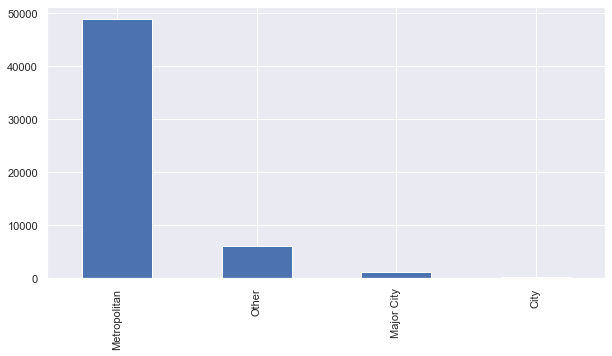

In [13]:
plt.figure(figsize=(10,5))
df['Registered City'].value_counts().plot(kind='bar')

# Cleaned dataset part 1

In [14]:
df.dtypes

Price              float64
Model Year           int64
Mileage              int64
Registered City     object
Engine Type         object
Engine Capacity      int32
Transmission        object
Color               object
Assembly            object
Body Type           object
dtype: object

In [15]:
df.head()

,Price,Model Year,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Body Type
0,2385000.0,2017,9869,Other,Petrol,1000,Automatic,Silver,Imported,Hatchback
1,111000.0,2019,11111,Metropolitan,Petrol,1300,Automatic,White,Local,Sedan
2,1530000.0,2019,17500,Other,Petrol,660,Automatic,White,Local,Hatchback
3,1650000.0,2019,9600,Metropolitan,Petrol,660,Manual,White,Local,Hatchback
4,1435000.0,2010,120000,Metropolitan,Petrol,1300,Manual,Black,Local,Sedan


# Exploratory Data Analysis

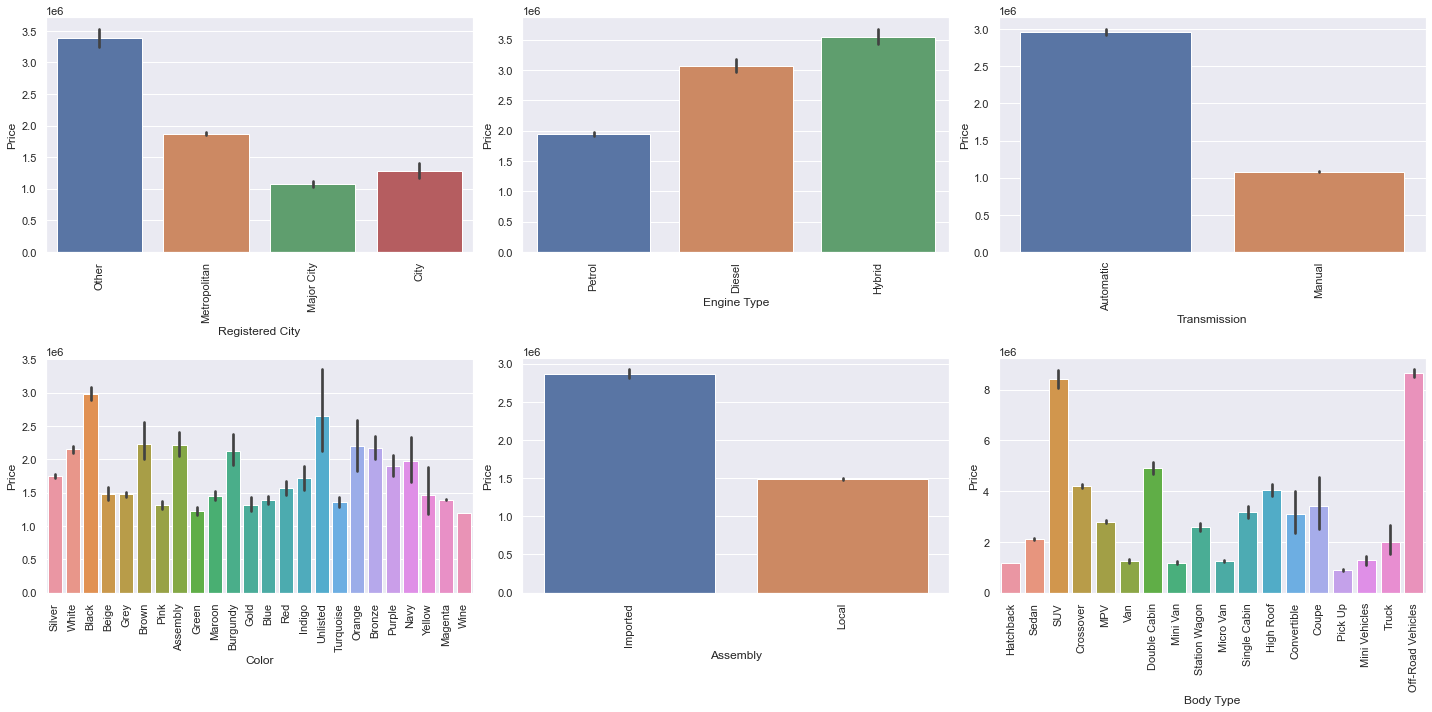

In [16]:
# list of categorical variables to plot
cat_vars = ['Registered City', 'Engine Type', 'Transmission', 'Color', 'Assembly', 'Body Type']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='Price', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

C:\Users\mishr\AppData\Local\Temp\ipykernel_17404\2115016549.py:19: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat_counts = cat_counts_top.append(cat_counts_other)
C:\Users\mishr\AppData\Local\Temp\ipykernel_17404\2115016549.py:19: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat_counts = cat_counts_top.append(cat_counts_other)


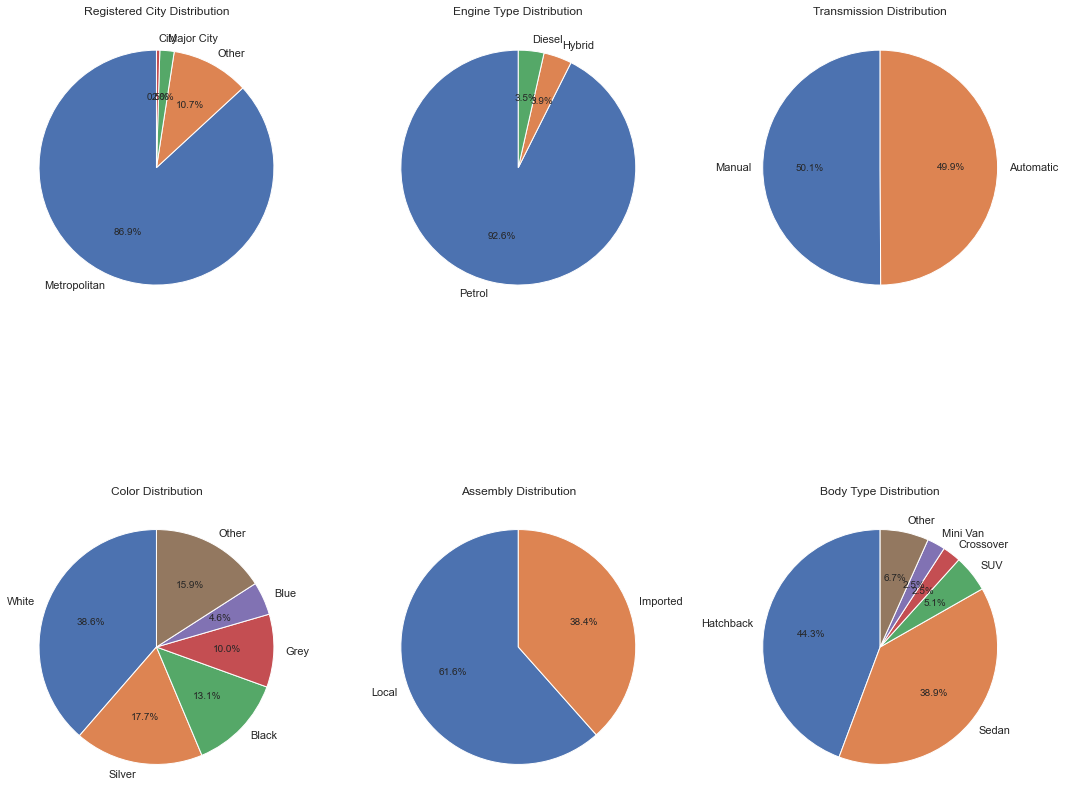

In [17]:
# Specify the maximum number of categories to show individually
max_categories = 5

cat_vars = ['Registered City', 'Engine Type', 'Transmission', 'Color', 'Assembly', 'Body Type']

# Create a figure and axes
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

# Create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # Count the number of occurrences for each category
        cat_counts = df[var].value_counts()

        # Group categories beyond the top max_categories as 'Other'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
            cat_counts = cat_counts_top.append(cat_counts_other)

        # Create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # Set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

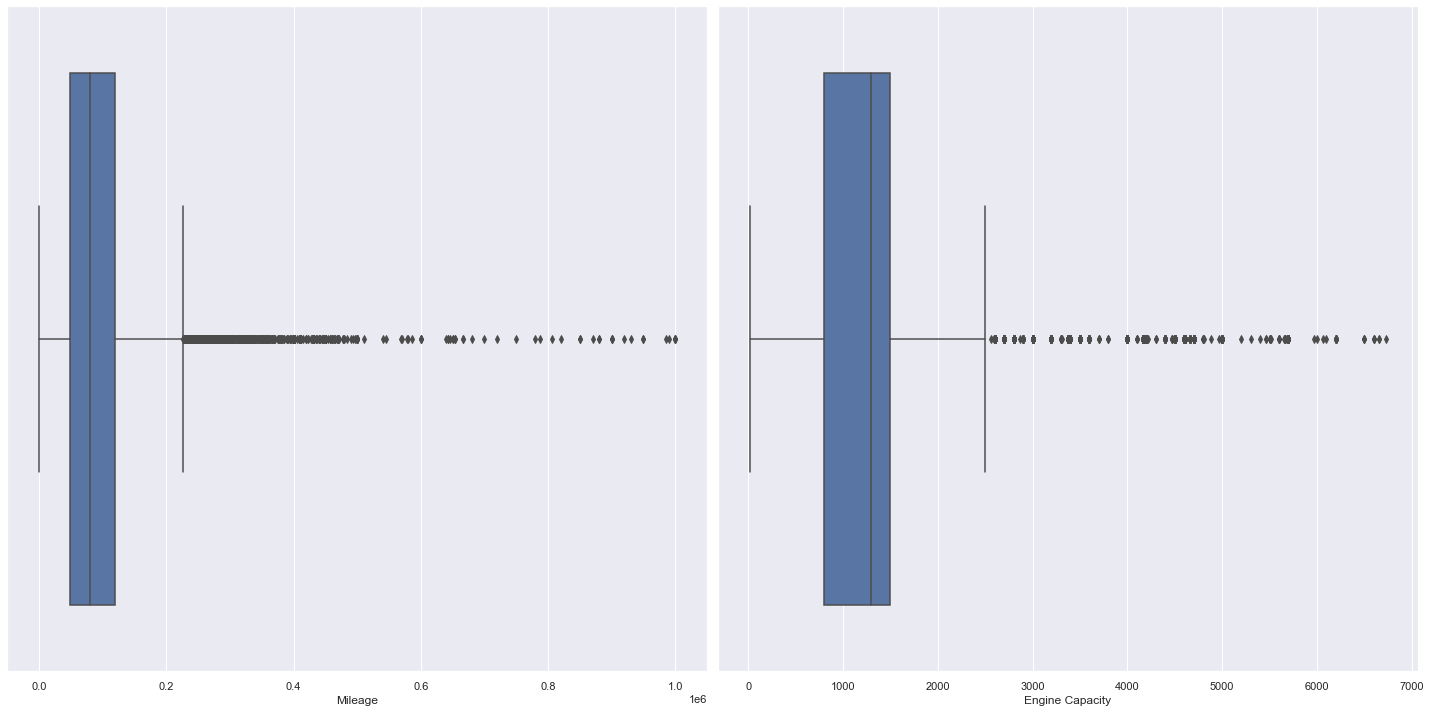

In [18]:
num_vars = ['Mileage', 'Engine Capacity']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

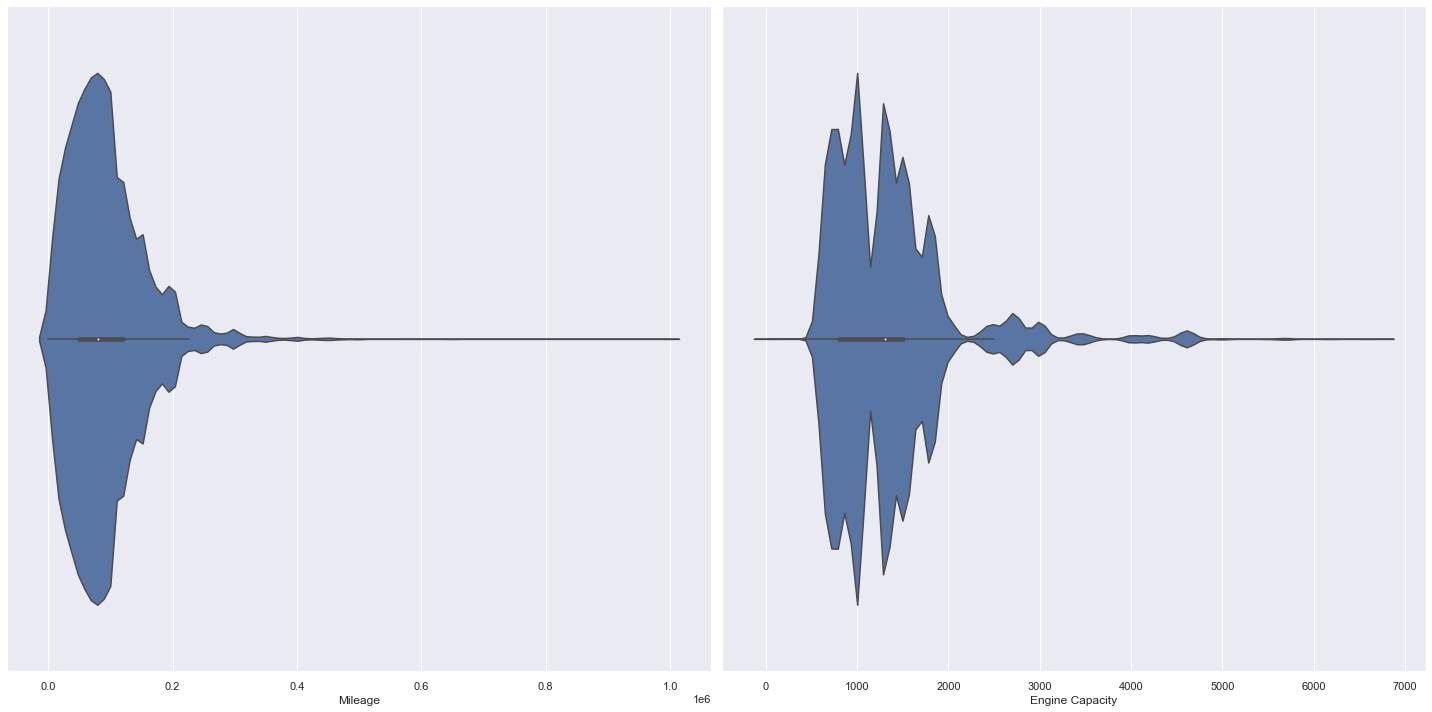

In [19]:
num_vars = ['Mileage', 'Engine Capacity']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

C:\Users\mishr\AppData\Local\Temp\ipykernel_17404\2377143571.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Model Year', y='Price', hue='Registered City', data=df, ci=None, estimator='mean', alpha=0.7)


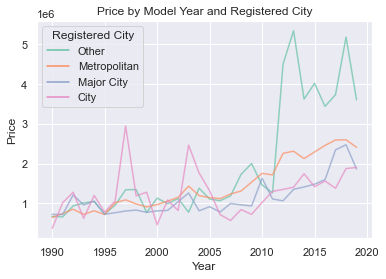

In [20]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

sns.lineplot(x='Model Year', y='Price', hue='Registered City', data=df, ci=None, estimator='mean', alpha=0.7)

plt.title("Price by Model Year and Registered City")
plt.xlabel("Year")
plt.ylabel("Price")

plt.show()

C:\Users\mishr\AppData\Local\Temp\ipykernel_17404\888348556.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Model Year', y='Price', hue='Engine Type', data=df, ci=None, estimator='mean', alpha=0.7)


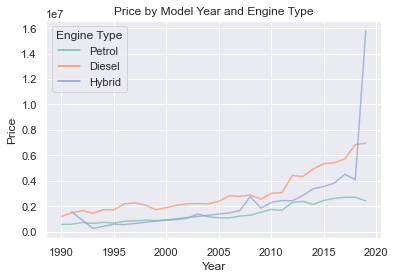

In [21]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

sns.lineplot(x='Model Year', y='Price', hue='Engine Type', data=df, ci=None, estimator='mean', alpha=0.7)

plt.title("Price by Model Year and Engine Type")
plt.xlabel("Year")
plt.ylabel("Price")

plt.show()

C:\Users\mishr\AppData\Local\Temp\ipykernel_17404\1597367281.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Model Year', y='Price', hue='Transmission', data=df, ci=None, estimator='mean', alpha=0.7)


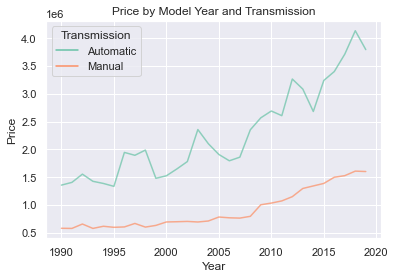

In [22]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

sns.lineplot(x='Model Year', y='Price', hue='Transmission', data=df, ci=None, estimator='mean', alpha=0.7)

plt.title("Price by Model Year and Transmission")
plt.xlabel("Year")
plt.ylabel("Price")

plt.show()

C:\Users\mishr\AppData\Local\Temp\ipykernel_17404\2248285258.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Model Year', y='Price', hue='Assembly', data=df, ci=None, estimator='mean', alpha=0.7)


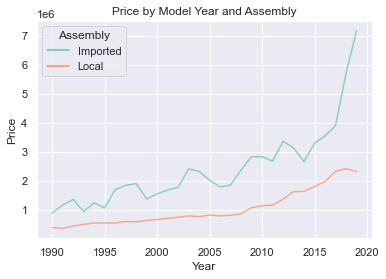

In [23]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

sns.lineplot(x='Model Year', y='Price', hue='Assembly', data=df, ci=None, estimator='mean', alpha=0.7)

plt.title("Price by Model Year and Assembly")
plt.xlabel("Year")
plt.ylabel("Price")

plt.show()

<AxesSubplot:xlabel='Engine Capacity', ylabel='Price'>

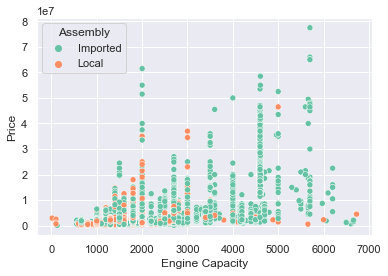

In [24]:
sns.scatterplot(x='Engine Capacity', y='Price', hue='Assembly', data=df)

<AxesSubplot:xlabel='Engine Capacity', ylabel='Price'>

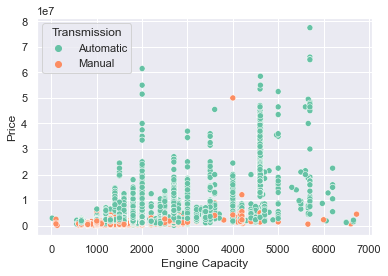

In [25]:
sns.scatterplot(x='Engine Capacity', y='Price', hue='Transmission', data=df)

<AxesSubplot:xlabel='Engine Capacity', ylabel='Price'>

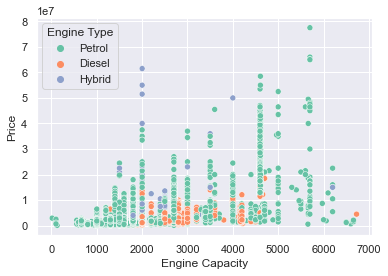

In [26]:
sns.scatterplot(x='Engine Capacity', y='Price', hue='Engine Type', data=df)

<AxesSubplot:xlabel='Engine Capacity', ylabel='Price'>

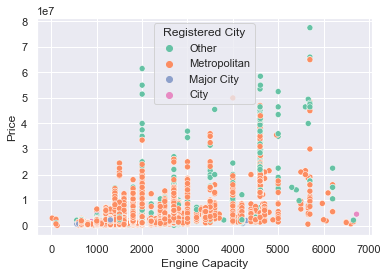

In [27]:
sns.scatterplot(x='Engine Capacity', y='Price', hue='Registered City', data=df)

# Data Preprocessing Part 2

In [28]:
# Check missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Body Type      11.513544
Engine Type     2.281707
Price           2.265689
dtype: float64

In [29]:
df.shape

(56186, 10)

In [30]:
# Remove the null value because its very low
df.dropna(inplace=True)
df.shape

(47564, 10)

# Label Encoding for each object dataype

In [31]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

Registered City: ['Other' 'Metropolitan' 'Major City' 'City']
Engine Type: ['Petrol' 'Diesel' 'Hybrid']
Transmission: ['Automatic' 'Manual']
Color: ['Silver' 'White' 'Black' 'Beige' 'Grey' 'Brown' 'Pink' 'Assembly'
 'Maroon' 'Burgundy' 'Gold' 'Blue' 'Red' 'Indigo' 'Unlisted' 'Green'
 'Turquoise' 'Orange' 'Bronze' 'Purple' 'Yellow' 'Navy' 'Magenta' 'Wine']
Assembly: ['Imported' 'Local']
Body Type: ['Hatchback' 'Sedan' 'SUV' 'Crossover' 'MPV' 'Van' 'Double Cabin'
 'Mini Van' 'Station Wagon' 'Micro Van' 'Single Cabin' 'High Roof'
 'Convertible' 'Coupe' 'Pick Up' 'Mini Vehicles' 'Truck'
 'Off-Road Vehicles']


In [32]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Registered City: [3 2 1 0]
Engine Type: [2 0 1]
Transmission: [0 1]
Color: [18 21  2  1  9  5 15  0 12  6  7  3 17 10 20  8 19 14  4 16 23 13 11 22]
Assembly: [0 1]
Body Type: [ 4 13 12  2  6 17  3  8 15  7 14  5  0  1 11  9 16 10]


# Correlation Heatmap

<AxesSubplot:>

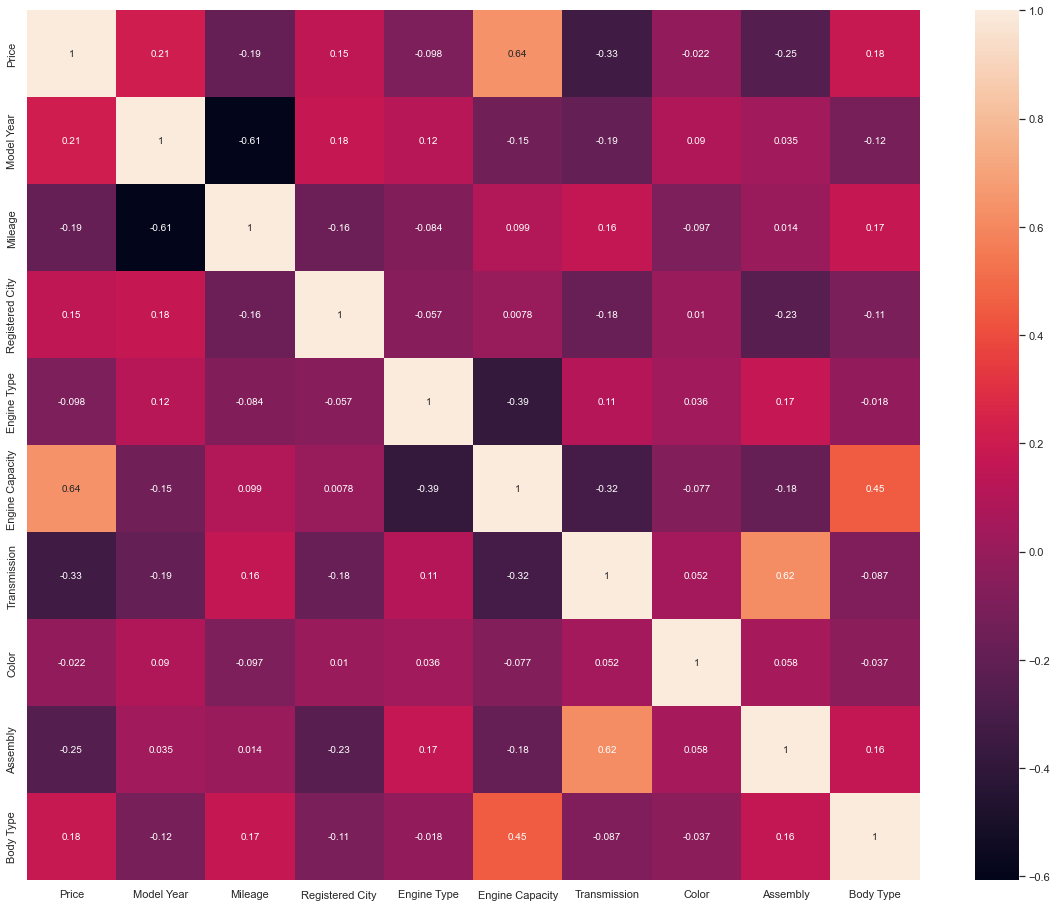

In [33]:
#Correlation Heatmap (print the correlation score each variables)
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

# Train Test Split

In [34]:
from sklearn.model_selection import train_test_split
# Select the features (X) and the target variable (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Remove the Outlier from train data using Z-Score

In [35]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['Mileage', 'Engine Capacity']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

# Decision Tree Regressor

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston


# Create a DecisionTreeRegressor object
dtree = DecisionTreeRegressor()

# Define the hyperparameters to tune and their values
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [0, 42]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 8, 'random_state': 0}


C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [37]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0, max_depth=8, max_features='auto', min_samples_leaf=3, min_samples_split=8)
dtree.fit(X_train, y_train)

C:\Users\mishr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=3,
                      min_samples_split=8, random_state=0)

In [38]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 354766.0090956561
MAPE is 0.13888668625590878
MSE is 2385067100555.926
R2 score is 0.7005650417501269
RMSE score is 1544366.245602359


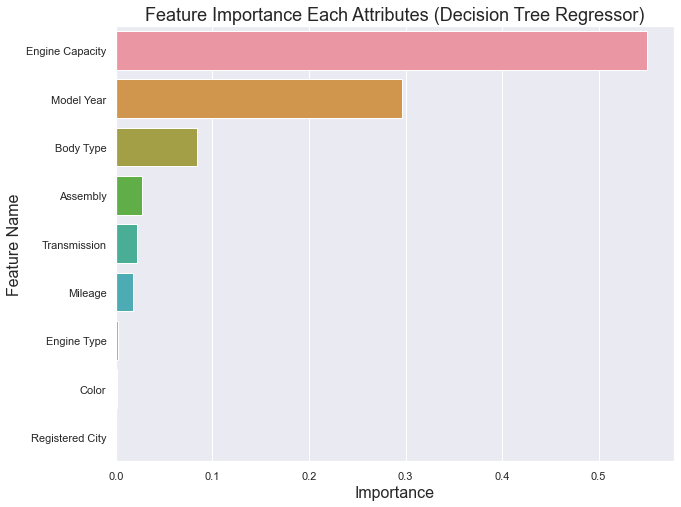

In [39]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

# AdaBoost Regressor

In [41]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

# Define AdaBoostRegressor model
abr = AdaBoostRegressor()

# Define hyperparameters and possible values
params = {'n_estimators': [50, 100, 150],
          'learning_rate': [0.01, 0.1, 1, 10],
          'random_state': [0, 42]}

# Perform GridSearchCV with 5-fold cross validation
grid_search = GridSearchCV(abr, param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print best hyperparameters and corresponding score
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'learning_rate': 0.01, 'n_estimators': 150, 'random_state': 0}


In [42]:
from sklearn.ensemble import RandomForestRegressor
abr = AdaBoostRegressor(random_state=0, learning_rate=0.01, n_estimators=150)
abr.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.01, n_estimators=150, random_state=0)

In [43]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = abr.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 709114.1171410958
MAPE is 0.4185430836642879
MSE is 3812927029936.1406
R2 score is 0.5213033437287274
RMSE score is 1952671.7670761107


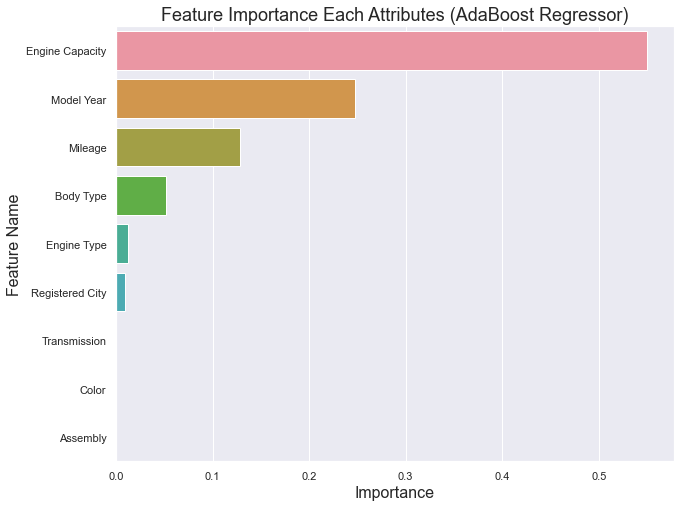

In [44]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": abr.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (AdaBoost Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()